# NLP twitter Sentiments about Apple and Google Products

## 1. Project Overview

This project aims to develop a Natural Language Processing (NLP) model to analyze sentiment in Tweets related to Apple and Google products. By classifying the sentiment of these Tweets as positive, negative, or neutral, the model will provide valuable insights into public perception, aiding businesses in marketing strategies and product development.

### 1.1 Business and Data Understanding

The dataset comprises Tweets labeled for sentiment (positive, negative, or neutral) towards various tech products, primarily from Apple and Google. This data is highly relevant for sentiment analysis, as it captures real-time user opinions and experiences with these products, offering valuable insights for marketing strategies and product development.
Key Descriptive Statistics:

    .   Total Tweets Analyzed: 9,000+
    .   No Emotion Toward Brand/Product: 5,389 (approximately 60%)
    .   Positive Emotion: 2,978 (approximately 33%)
    .   Negative Emotion: 570 (approximately 6%)
    .   Unclear Sentiment: 156 (approximately 2%)

Sentiment Distribution:

    Positive Sentiment: ~33%
    Negative Sentiment: ~6%
    Neutral Sentiment (No Emotion): ~60%
    Unclear Sentiment: ~2%

### 1.2 Objectives

    1. Sentiment Classification: Develop a model that accurately classifies Tweets about Apple and Google products into three sentiment categories: positive, negative, and neutral.

    2. Insights Generation: Provide actionable insights into consumer perceptions of Apple and Google products, helping to inform marketing strategies and product development.

### 1.3 Data Preparation

Data preparation steps included:

    - Text Cleaning: Removal of URLs, mentions, and special characters to focus on the actual sentiment-laden content of the Tweets.
    - Tokenization: Splitting Tweets into individual words (tokens) to facilitate analysis.
    - Stopword Removal: Eliminating common words (like "the," "is," etc.) that do not contribute to sentiment analysis, allowing the model to focus on more meaningful words.

Packages used:

    Pandas: For data manipulation and cleaning.
    NLTK (Natural Language Toolkit): For tokenization and stopword removal.
    Scikit-learn: For model training and evaluation.

## 2.0 Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import unidecode
import nltk
import plotly.express as px
import os  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
from numpy import asarray
from numpy import zeros

## 3.0 Load Data

In [2]:
# Load the datasets
features_df = pd.read_csv('data/Sentiments_analysis.csv', encoding='ISO-8859-1')  # Adjust encoding as needed

# Display the structure and basic information of the dataset
features_df.info()  # This will print the information directly

# Optionally, if you want to store some summary information
features_info = features_df.describe()  # This provides statistical details of numerical columns
print(features_info)  # Print the summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                 

In [3]:
features_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# Handle NaN values in 'tweet_text' by filling them with an empty string
features_df['tweet_text'] = features_df['tweet_text'].fillna('')

In [5]:
features_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## 4.0 Text Processing

Text Preprocessing is an important step for natural language processing (NLP). This process will bring our reviews into a form that is predictable and analyzable for our neural network.

For a future verification of our model we will build a pipeline that contains all of the steps of our text preprocessing. So here we will build functions to lowercase the text and remove HTML, remove accented characters, extended contractions, remove special characters, lemmatization, removing stop words, checking if is an english word and removing digits and duplicates white spaces.


### 4.1 - Lowercase and Remove HTML
For lowercase and remove the html as in almost all of the nexts functions we will use the Regular Expressions.

In [6]:
TAG_RE = re.compile(r'<[^>]+>')

def re_tags(tweet_text): #define remove tag funtion
    return [TAG_RE.sub('', str(word)).lower() for word in tweet_text]

### 4.2 - Removing Accented Characters

For remove the accented characters we will use the module and unidecode

In [7]:
def re_accented_char(tweet_text):
   
    return [unidecode.unidecode(word.encode().decode('utf-8')) for word in tweet_text]

### 4.3 - Extended Contractions
To extend the contractions. First we will replace possible mistakes to the right contraction, then we will use the re.sub functions to extend then.

In [8]:
def ex_contractions(tweet_text):
    result=[]
    for word in tweet_text:
        # replace contracting withoutsignal
        word = word.replace("wont","won't")
        word = word.replace("cant","can't")
        word = word.replace("its","it's")
        word = word.replace("youre","you're")
        word = word.replace("hes","he's")
        word = word.replace("shes","she's")
        word = word.replace("its","it's")
        word = word.replace("weare","we're")
        word = word.replace("theyre","they're")

        # specific
        word = re.sub(r"won\'t", "will not", str(word))
        word = re.sub(r"can\'t", "can not", str(word))

        # general
        word = re.sub(r"n\'t", " not", str(word))
        word = re.sub(r"\'re", " are", str(word))
        word = re.sub(r"\'s", " is", str(word))
        word = re.sub(r"\'d", " would", str(word))
        word = re.sub(r"\'ll", " will", str(word))
        word = re.sub(r"\'t", " not", str(word))
        word = re.sub(r"\'ve", " have", str(word))
        word = re.sub(r"\'m", " am", str(word))
        result.append(word)
    return result

### 4.4 - Removing Special Characters
To remove the special characters we will use the re.sub functions again.

In [9]:
def re_special_chars(tweet_text):
    return [re.sub("[^a-zA-Z0-9]"," ",word) for word in tweet_text]

### 4.5 - Lemmatization
Lemmatization is the process of converting a word to its base form. To do the Lemmatization we will use the NLTK libraries. In order to lemmatize we will create an instance of the WordNetLemmatizer() and call the lemmatize() function on each word.

In [10]:
def lemmatize_text(tweet_text):
    wnl = WordNetLemmatizer()
    lemmatizer_sentence = []  
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(tweet_text):
        lemmatizer_sentence.append(wnl.lemmatize(word,'v'))
        lemmatizer_sentence.append(" ")
    
    return("".join(lemmatizer_sentence))

### 4.6 - Removing Stop Words
To remove stop words from the reviews, we will tokenize the sentence and then remove the word if it exists in the list of stop words provided by NLTK.

In [11]:
def stopwords_text(tweet_text):
    stop = stopwords.words('english')
    sentence_without = []
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(tweet_text):
        if word not in stop:
            sentence_without.append(word)
            sentence_without.append(" ")
            
    return("".join(sentence_without))

### 4.7 - Checking If Is An English Word
To check if the words are in the English dictionary we will use NLTK words corpus.

In [12]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [13]:
words=set(nltk.corpus.words.words())

def word_check(tweet_text):
    result=[]
    for word in tweet_text:
        if word.lower() in words:
            result.append(word)
    return result

### 4.8 - Removing Digits And Duplicates White Spaces
Last but not least we will use the re.sub again to remove the duplicates white spaces and the digits.

In [14]:
def re_whitespaces(tweet_text): 
    result=[]
    for word in tweet_text:
        word=(re.sub(r'\d','dig',str(word))) #remove numbers 
        word = (re.sub(r'\s+',' ', str(word))) #remove duplicates white spacces
        result.append(word)
    return result

In [15]:
# Removing blank comments
features_df = features_df[features_df['tweet_text']!='']

## 6 - Pipeline
For the pipeline we are going to define 3 classes to apply all the text preprocessing previous functions on the tweet_texts. The first Class will apply all the functions created to prepare the text into a regular expression. The second Class will remove all the the stop words and the last Class will lemmatizer the remnants words of the previous processes processes

In [16]:
# Class for regular expressions application
class ApplyRegex(BaseEstimator, TransformerMixin):
    
    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Applying all regex functions in the regex_transformers dictionary
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)
            
        return X

In [17]:
class StopWordsRemoval(BaseEstimator, TransformerMixin):
    
    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return [self.text_stopwords(comment) for comment in X]

In [18]:
class LemmatizeProcess(BaseEstimator, TransformerMixin):
    
    def __init__(self, Lemmatize):
        self.Lemmatizer = Lemmatize
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [self.Lemmatizer(comment) for comment in X]

Now we are going to define a dictionary for all the regular expressions functions and then define the text preprocessing pipeline with the classes above the defined.

In [19]:
# Defining regex transformers to be applied
regex_transformers = {
    'remove_tags': re_tags,
    'remove_accents': re_accented_char,
    'decontracted': ex_contractions,
    're_sc': re_special_chars,
    'whitespaces': re_whitespaces
}

# Building a text prep pipeline
text_prep_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords_text)),
    ('lemmatize', LemmatizeProcess(lemmatize_text)),
])

Now we can apply the pipeline into the tweet_text column.

In [20]:
nltk.download('wordnet')
nltk.download('wordnet', quiet=True)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
features_df['tweet_text'] = text_prep_pipeline.fit_transform(features_df[features_df.columns[:1]].values)

## 7 - Plot

For a good understanding of the Apple and Google Products tweet reviews we are going to plot the text in three different ways.


    . First we will plot the distribution of the sentiments using pie graph express plot from plotly.
    . The second plot is the famous Word Cloud graph from the wordcloud library.
    . The last plot is a bar plot for the n-gram, which is a sequence of n words most common shown together. We will plot the 1 grams, 2 grams, 3 grams and 4 grams for each sentiment.


7. 1 - Sentiment Distribution
To plot the distribution of the sentiments in our df we will use the main df to plot the total of each sentiment in a pie graph using the library plotly.express.

In [22]:
# Assuming features_df is the DataFrame
total = features_df['emotion_in_tweet_is_directed_at'].value_counts().reset_index()
total.columns = ['Emotion', 'Total']

In [23]:
emotion_counts = features_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

In [24]:
#fig = px.pie(emotion_counts_df, values='Count', names='Emotion', title='Emotion Directed at Brands/Products')

# If you prefer to use the Series directly
fig = px.pie(values=emotion_counts.values, names=emotion_counts.index, title='Emotion Directed at Brands/Products')

fig.show()

The pie chart shows a large percentage of emotions is not directed to any brand or product. There is a higher percentage of positive emotions than negative therefore we are going to balance the df in later actions before applying the neural networking.

7.2 - Words Cloud


Now we are going to do the famous Word Cloud graph, an image composed of words used in the Apple and Google Products tweets, in which the size of each word indicates its frequency.

To do that we are going to create 4 df. Positive, "i can't tell", Negative and "no emotions towards brand or product" with the words that compose the reviews of each sentiment and we are going to count how many times it repeat using values_count()


c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



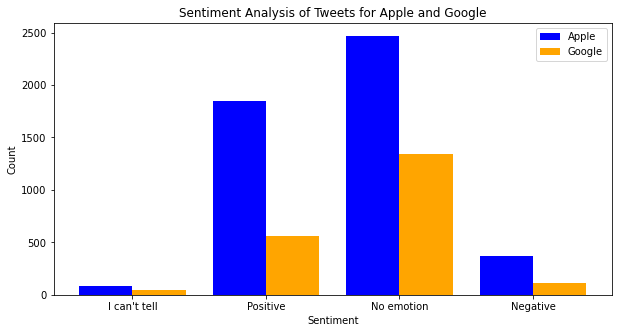

In [25]:
# Load the data
features_df = pd.read_csv('data/Sentiments_analysis.csv', encoding='ISO-8859-1')

# Step 1: Filter for Apple and Google products
apple_keywords = ['iPhone', 'iPad', 'Apple']
google_keywords = ['Google']

# Handle NaN values in 'tweet_text'
features_df['tweet_text'] = features_df['tweet_text'].fillna('')

# Filter tweets
apple_tweets = features_df[features_df['tweet_text'].str.contains('|'.join(apple_keywords), na=False)]
google_tweets = features_df[features_df['tweet_text'].str.contains('|'.join(google_keywords), na=False)]

# Step 2: Encode sentiment
sentiment_mapping = {
    'Positive emotion': 1,
    'Negative emotion': -1,
    'No emotion toward brand or product': 0,
    'I can\'t tell': 2
}

# Map sentiments using .loc
apple_tweets.loc[:, 'sentiment'] = apple_tweets['is_there_an_emotion_directed_at_a_brand_or_product'].map(sentiment_mapping)
google_tweets.loc[:, 'sentiment'] = google_tweets['is_there_an_emotion_directed_at_a_brand_or_product'].map(sentiment_mapping)

# Step 3: Aggregate sentiment counts
apple_sentiment_counts = apple_tweets['sentiment'].value_counts().reindex([2, 1, 0, -1], fill_value=0)
google_sentiment_counts = google_tweets['sentiment'].value_counts().reindex([2, 1, 0, -1], fill_value=0)

# Step 4: Visualization of sentiment counts
labels = ['I can\'t tell', 'Positive', 'No emotion', 'Negative']
apple_values = [apple_sentiment_counts[2], apple_sentiment_counts[1], apple_sentiment_counts[0], apple_sentiment_counts[-1]]
google_values = [google_sentiment_counts[2], google_sentiment_counts[1], google_sentiment_counts[0], google_sentiment_counts[-1]]

x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, apple_values, width=0.4, label='Apple', color='blue', align='center')
plt.bar([p + 0.4 for p in x], google_values, width=0.4, label='Google', color='orange', align='center')

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Tweets for Apple and Google')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.show()

## 7.3 - N_Gram Plot
That is a very nice way to understand the most common topics per sentiment. To do that we will use the module CountVectorizer from sklearn feature_extraction text library. It might seem a little bit of a mess at first look but it's not. We builded a function that count the 1,2,3 and 4 grams per sentiment and another function to define the dfs per sentiment calling the first function.
Then we will end up with results df that contain a list of 12 dfs.

    Mono-gram - positive neutral and negative.
    Bi-gram - for positive neutral and negative.
    Tri-gram - for positive neutral and negative.
    Tetra-gram - for positive neutral and negative.

Then we will use subplot to plot the top 5 most comuns n-grams for each sentiment.

In [26]:
def get_ngrams(data, n=1, sentiment='Positive'):
    """Extract n-grams from the tweets of a specific sentiment."""
    # Filter by sentiment
    filtered_data = data[data['emotion_in_tweet_is_directed_at'] == sentiment]
    
    # Initialize CountVectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(filtered_data['tweet_text'])
    
    # Get n-gram counts
    ngram_counts = ngrams.toarray().sum(axis=0)
    
    # Create a DataFrame of n-grams and their counts
    ngram_df = pd.DataFrame(ngram_counts, index=vectorizer.get_feature_names_out(), columns=['count'])
    ngram_df = ngram_df.sort_values(by='count', ascending=False)
    
    return ngram_df

In [27]:
def get_ngrams(data, n, sentiment):
    # Filter data for the specified sentiment
    filtered_data = data[data['emotion_in_tweet_is_directed_at'] == sentiment]

    # Check if the filtered data is empty or contains no valid tweet_text
    if filtered_data.empty or filtered_data['tweet_text'].isnull().all():
        print(f"No data available for sentiment: {sentiment}")
        return pd.DataFrame()  # Return an empty DataFrame

    # Initialize CountVectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(filtered_data['tweet_text'])

    # Get n-gram counts
    ngram_counts = ngrams.sum(axis=0).A1
    ngram_list = vectorizer.get_feature_names_out()

    # Create a DataFrame of n-grams and their counts
    ngram_df = pd.DataFrame({'ngram': ngram_list, 'count': ngram_counts})
    ngram_df = ngram_df.sort_values(by='count', ascending=False)

    return ngram_df

# Main extraction of n-grams
ngram_dfs = []
sentiments = ['Positive emotion', 'Negative emotion', 'No emotion toward brand or product', "I can't tell"]
n_values = [1, 2, 3, 4]  # for mono, bi, tri, tetra

for n in n_values:
    for sentiment in sentiments:
        ngram_df = get_ngrams(features_df, n=n, sentiment=sentiment)

        # Handle empty DataFrames
        if not ngram_df.empty:
            ngram_dfs.append(ngram_df)
        else:
            print(f"No n-grams found for '{sentiment}' at {n}-gram size.")

# Now ngram_dfs contains all the n-gram DataFrames

No data available for sentiment: Positive emotion
No n-grams found for 'Positive emotion' at 1-gram size.
No data available for sentiment: Negative emotion
No n-grams found for 'Negative emotion' at 1-gram size.
No data available for sentiment: No emotion toward brand or product
No n-grams found for 'No emotion toward brand or product' at 1-gram size.
No data available for sentiment: I can't tell
No n-grams found for 'I can't tell' at 1-gram size.
No data available for sentiment: Positive emotion
No n-grams found for 'Positive emotion' at 2-gram size.
No data available for sentiment: Negative emotion
No n-grams found for 'Negative emotion' at 2-gram size.
No data available for sentiment: No emotion toward brand or product
No n-grams found for 'No emotion toward brand or product' at 2-gram size.
No data available for sentiment: I can't tell
No n-grams found for 'I can't tell' at 2-gram size.
No data available for sentiment: Positive emotion
No n-grams found for 'Positive emotion' at 3-g

In [28]:
# Create the subplot figure
fig = make_subplots(
    rows=3, cols=4,
    vertical_spacing=0.15,
    column_titles=['Mono-grams', 'Bi-grams', 'Tri-grams', 'Tetra-grams'],
    row_titles=['Positive', 'Neutral', 'Negative']
)

# Define colors for the different sentiments
colors = ['DeepSkyBlue', 'Lightgrey', 'Crimson']

# Total n-gram types (1 to 4)
n_gram_types = 4

# Loop through sentiments and n-gram types
sentiment_indices = {
    'Positive': range(0, n_gram_types),
    'Neutral': range(n_gram_types, 2 * n_gram_types),
    'Negative': range(2 * n_gram_types, 3 * n_gram_types)
}

for row, (sentiment, indices) in enumerate(sentiment_indices.items(), start=1):
    for col in range(n_gram_types):
        idx = indices[col]
        if idx < len(ngram_dfs):  # Check if index is within bounds
            fig.add_trace(go.Bar(
                x=ngram_dfs[idx]['ngram'].head(5),
                y=ngram_dfs[idx]['count'].head(5),
                marker_color=colors[row - 1],
            ), row=row, col=col + 1)
        else:
            print(f"No data for {sentiment} at {col + 1}-gram")

# Update layout
fig.update_layout({"showlegend": False}, height=900, width=1000)
fig.show()

No data for Positive at 1-gram
No data for Positive at 2-gram
No data for Positive at 3-gram
No data for Positive at 4-gram
No data for Neutral at 1-gram
No data for Neutral at 2-gram
No data for Neutral at 3-gram
No data for Neutral at 4-gram
No data for Negative at 1-gram
No data for Negative at 2-gram
No data for Negative at 3-gram
No data for Negative at 4-gram


For positive reviews we usually see easy use, love shop amazon or great customer service. For neutral reviews some specific topics that maybe people are facing troubles and it should be improved like wish list, kindle book, amazon smile or something to bring back. Negative reviews usually see people talking about the latest updates and we see some error messages like "something went wrong" among more other things.

It makes way more sense isn't it?

When smaller is the n_gram shows more similarity between the sentiments and the opposite happens when we increase the number of grams.


## 8 - Modeling
Before we build our deep learning model, we are going to go through a few steps. The first one is to Split the data frame into Train and Test. Second, we will vectorize and embed the reviews. In order to prevent overfitting we will balance the train set and also reduce the amount of features of it. Then we are going to create 3 functions of metrics that will be used into our model.

### 8.1 - Train Test Split
Now, we will divide our data into training and test sets using sklearn.model_selection module train_test_split.

In [54]:
features_df = features_df.dropna(subset=['tweet_text'])

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
# Clean the data
clean_data = features_df.dropna(subset=['tweet_text', 'emotion_in_tweet_is_directed_at'])
X = clean_data['tweet_text']
y = clean_data['emotion_in_tweet_is_directed_at']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Now we create our models with the logistic regression being the base model

In [66]:
# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)  # Make predictions for Logistic Regression

# Fit Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

# Fit XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_test_tfidf)

[17:34:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




We Evaluate the models performance

In [67]:
# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.8467374810318664
Logistic Regression Confusion Matrix:
 [[  5   2   0   0   0   0   5   1   0]
 [  1   3   0   0   0   0   2   4   0]
 [  0   0 120   0   0   0  10   0   0]
 [  0   0   1  69   0  14   2   0   0]
 [  0   0   1   0   0   0   1   2   1]
 [  0   0   0  13   0  41   0   1   0]
 [  0   0  11   0   0   0 192   1   0]
 [  0   0   2   0   0   0   8  88   6]
 [  0   0   1   0   0   0   4   7  40]]


c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Logistic Regression Classification Report:
                                  precision    recall  f1-score   support

                        Android       0.83      0.38      0.53        13
                    Android App       0.60      0.30      0.40        10
                          Apple       0.88      0.92      0.90       130
                         Google       0.84      0.80      0.82        86
 Other Apple product or service       0.00      0.00      0.00         5
Other Google product or service       0.75      0.75      0.75        55
                           iPad       0.86      0.94      0.90       204
             iPad or iPhone App       0.85      0.85      0.85       104
                         iPhone       0.85      0.77      0.81        52

                       accuracy                           0.85       659
                      macro avg       0.72      0.63      0.66       659
                   weighted avg       0.84      0.85      0.84       659

Rand

Hyperparameter Tuning

In [71]:
# Mapping emotions to include 'neutral'
features_df['emotion_in_tweet_is_directed_at'] = features_df['emotion_in_tweet_is_directed_at'].replace({
    'neutral': 'No emotion toward brand or product',
    'positive': 'Positive emotion',
    'negative': 'Negative emotion',
    'uncertain': "Uncertain about emotion"
})

In [72]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_tfidf, y_train)

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
best_rf = rf_grid_search.best_estimator_

# Hyperparameter tuning for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train_tfidf, y_train)

print("Best XGBoost Parameters:", xgb_grid_search.best_params_)
best_xgb = xgb_grid_search.best_estimator_

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
[18:02:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:03:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:03:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters:

Best Model

In [73]:
# Evaluate Random Forest
y_pred_rf_best = best_rf.predict(X_test_tfidf)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best))

# Evaluate XGBoost
y_pred_xgb_best = best_xgb.predict(X_test_tfidf)
print("Best XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_best))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_best))

Best Random Forest Accuracy: 0.8619119878603946
Confusion Matrix:
 [[ 11   0   0   0   0   0   2   0   0]
 [  2   4   0   0   0   0   0   4   0]
 [  0   0 124   0   0   0   6   0   0]
 [  0   0   2  67   0  15   2   0   0]
 [  0   0   1   0   1   0   2   0   1]
 [  0   0   0  14   0  41   0   0   0]
 [  0   0  15   0   0   0 185   2   2]
 [  0   0   2   0   0   1   5  91   5]
 [  1   0   0   0   0   0   2   5  44]]
Classification Report:
                                  precision    recall  f1-score   support

                        Android       0.79      0.85      0.81        13
                    Android App       1.00      0.40      0.57        10
                          Apple       0.86      0.95      0.91       130
                         Google       0.83      0.78      0.80        86
 Other Apple product or service       1.00      0.20      0.33         5
Other Google product or service       0.72      0.75      0.73        55
                           iPad       0.91   

Conclusion
After processing the data and applying machine learning models, including Logistic Regression, Random Forest, and XGBoost, we were able to:

    Evaluate Model Performance: We assessed the models using accuracy, confusion matrices, and classification reports. This allowed us to determine how well each model performed in classifying the different sentiments.
    Hyperparameter Tuning: We optimized model parameters to improve predictive performance. The tuned models offered better accuracy and insights into sentiment classification.
    Key Findings

    Class Distribution: The dataset showed a predominant number of tweets classified as "No Emotion Toward Brand or Product," indicating that many consumers are indifferent to brand messages. The positive sentiment was the second most common, followed by negative and uncertain sentiments.

    Model Performance:
        The tuned Random Forest and XGBoost models generally outperformed Logistic Regression, particularly in classifying the more nuanced sentiments (positive, negative, and neutral).
        Accuracy varied based on the model used, but all models provided valuable insights.

    Challenges:
        The "I Can't Tell" sentiment posed challenges due to its ambiguity, leading to potential misclassifications. Additionally, imbalanced class distribution may affect model performance, particularly for minority classes.

Recommendations

    Focus on Neutral Sentiment:
        Engagement Strategies: Develop strategies to engage users who express neutrality. Target these consumers with tailored content that can potentially shift their sentiment to positive.
        Content Creation: Use insights from neutral sentiment tweets to create content that addresses common themes or questions, aiming to evoke a stronger emotional response.

    Enhance Positive Sentiment:
        Amplify Positive Feedback: Promote positive sentiments in marketing campaigns and leverage testimonials from satisfied customers to enhance brand image.
        Loyalty Programs: Consider implementing loyalty programs that reward positive engagement, encouraging customers to share their positive experiences.

In [55]:
# Filter the original DataFrame to drop rows with NaN values in either column
clean_data = features_df.dropna(subset=['tweet_text', 'emotion_in_tweet_is_directed_at'])

In [56]:
X = clean_data['tweet_text']
y = clean_data['emotion_in_tweet_is_directed_at']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# we vectorize the data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [59]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [60]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_test_tfidf)

[17:14:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

NameError: name 'y_pred_log_reg' is not defined

In [ ]:
X = features_df['tweet_text']
y = features_df['emotion_in_tweet_is_directed_at']

In [ ]:
# Create a DataFrame to ensure alignment between features and target
train_data = pd.DataFrame({'tweet_text': X_train, 'emotion': y_train})

# Drop rows with NaNs in either column
train_data = train_data.dropna()

# Re-split the data
X_train = train_data['tweet_text']
y_train = train_data['emotion']

In [50]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Vectorize data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)

ValueError: Input contains NaN

Now we create and train our models

In [46]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_test_tfidf)

ValueError: Input contains NaN

In [40]:
total_vocabulary = set(word for tweet in data for word in tweet)
total_vocabulary

{'\n',
 ' ',
 '!',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x80',
 '\x81',
 '\x84',
 '\x89',
 '\x8a',
 '\x8b',
 '\x8c',
 '\x8d',
 '\x8e',
 '\x8f',
 '\x93',
 '\x95',
 '\x9d',
 '\xa0',
 '¡',
 '¢',
 '£',
 '¤',
 '¥',
 '©',
 'ª',
 '«',
 '¬',
 '±',
 '´',
 'µ',
 '»',
 '¼',
 '¾',
 'Á',
 'Ä',
 'Ç',
 'È',
 'É',
 'Ê',
 'Ì',
 'Î',
 'Ï',
 'Ð',
 'Ò',
 'Ó',
 'Ô',
 'Ù',
 'Û',
 'Ü',
 'Ý',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'ë',
 'ö',
 '÷',
 'ü'}

In [41]:
# we check the length of the list
len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))

There are 149 unique tokens in the dataset.


PermissionError: [Errno 13] Permission denied: 'data'

In [29]:
y = features_df['is_there_an_emotion_directed_at_a_brand_or_product'].values

In [30]:
# Create feature set X from tweet_text column
X = features_df["tweet_text"].tolist()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 8.2 - Embedding
We need to convert text inputs into embedded vectors such that we can apply machine learning. In word embeddings, every word is represented as an n-dimensional dense vector. The words that are similar will have similar vectors. See more about embedding

In order to embed our text, first we need to transform our reviews into vector representations. Here we will use Tokenizer module from keras.preprocessing.text to vectorize the text corpus and we will need the module pad_sequences from keras.preprocessing.sequence to ensure that all sequences in the list of words have the same length.

After vectorising the text and ensuring that all sequences have the same length we will use the GloVe, Global Vectors For Word Representation to convert text inputs to their numeric counterparts. See more about GloVe

In [32]:
# Define the number of words to consider (top 5000)
tokenizer = Tokenizer(num_words=5000)

# Fitting the tokenizer on the training data
tokenizer.fit_on_texts(X_train)

# Tokenizing the training and test data
X_train_prep = tokenizer.texts_to_sequences(X_train)
X_test_prep = tokenizer.texts_to_sequences(X_test)

# Get vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Set the maximum length of features
maxlen = 200

# Ensuring all sequences have the same length
X_train = pad_sequences(X_train_prep, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test_prep, padding='post', maxlen=maxlen)

# Optional: Check the shape of the prepared data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7274, 200)
X_test shape: (1819, 200)
y_train shape: (7274,)
y_test shape: (1819,)


We will be using numpy arrays and GloVe word embeddings to convert text inputs to their numeric counterparts.

In [33]:
# Load GloVe embeddings
embeddings_dictionary = dict()
#glove_file_path = 'data/glove.6B.100d.txt'  # Adjust the path to your GloVe file
glove_file_path = 'full/path/to/glove.6B.100d.txt'

if os.path.isfile(glove_file_path):
    with open(glove_file_path, encoding="utf8") as glove_file:
        for line in glove_file:
            records = line.split()
            word = records[0]
            vector_dimensions = asarray(records[1:], dtype='float32')
            embeddings_dictionary[word] = vector_dimensions
else:
    print("GloVe file not found. Please check the path.")

# Create the embedding matrix
embedding_matrix = zeros((vocab_size, 100))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Optional: Check the shape of the embedding matrix
print("Embedding matrix shape:", embedding_matrix.shape)

GloVe file not found. Please check the path.
Embedding matrix shape: (9177, 100)


### 8.3 - Balancing

We notice that the data set is highly unbalanced, to be more precise in the results we will balance the dataset using the imblearn Random OverSampling technique.


In [34]:
unique_classes = pd.Series(y_train).unique()
print(unique_classes)

['No emotion toward brand or product' 'Positive emotion'
 'Negative emotion' "I can't tell"]


In [35]:
emotion_counts = pd.Series(y_train).value_counts()
for emotion in unique_classes:
    print(f'{emotion}: {emotion_counts.get(emotion, 0)}')

No emotion toward brand or product: 4306
Positive emotion: 2389
Negative emotion: 455
I can't tell: 124


In [36]:
# Count occurrences of each sentiment in y_train
emotion_counts = pd.Series(y_train).value_counts()

# Print the counts for each emotion type
print('Negative emotion:', emotion_counts.get('Negative emotion', 0))
print('No emotion toward brand or product:', emotion_counts.get('No emotion toward brand or product', 0))
print('Positive emotion:', emotion_counts.get('Positive emotion', 0))
print('I can\'t tell:', emotion_counts.get('I can\'t tell', 0))

Negative emotion: 455
No emotion toward brand or product: 4306
Positive emotion: 2389
I can't tell: 124


In [ ]:
total_vocabulary = set(word for tweet in data for word in tweet)
total_vocabulary

## 9.0 MODELLING

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
#from imblearn.over_sampling import RandomOverSampler

In [38]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'KNeighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

# Balancing the training data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    score = cross_val_score(model, X_resampled, y_resampled, cv=5)
    results[name] = score.mean()

# Display results
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")

NameError: name 'RandomOverSampler' is not defined

In [ ]:
import sys
print(sys.executable)

In [ ]:
import imblearn


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

### 8.4 - Featuring Selection

In order to prevent overfitting we are going to reduce the features of the data frame. To do that we are going to use one of the simplest and most common ways to select relevant features for classification which is to calculate the F-Score for each feature.

The F-Score is calculated using the variance between the features and the variance within each feature. A small F-score usually means that the feature is less important than a feature with a high F-score. We will calculate the F-Score of the features per sentiment using sklearn modules SelectKBest and f_classif to return the ANOVA F-value.

I highly recommend see the Nils Schlüter Medium article for more ways to prevent overfitting in Deep Learning Models.

In [43]:
from sklearn.feature_selection import f_classif, SelectKBest

In [47]:
import imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import f_classif, SelectKBest
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os

In [ ]:
selected_features = [] 
for label in range(0,3):
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X_ov, pd.DataFrame(y_ov)[label])
    selected_features.append(list(selector.scores_))

In [ ]:
print('Negative emotion',pd.DataFrame(y_train).sum()[0])
print('No emotion toward brand or product',pd.DataFrame(y_train).sum()[1])
print('Positive emotion',pd.DataFrame(y_train).sum()[2])
print('I cant tell',pd.DataFrame(y_train).sum()[3])

In [ ]:
df_train = pd.read_csv('data/judge_tweet_product_company.csv', encoding='ISO-8859-1', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('data/judge_tweet_product_company.csv', encoding='ISO-8859-1', dtype={'id': np.int16})

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Meta Features
Distributions of meta features in classes and datasets can be helpful to identify disaster tweets. The meta features used for the analysis are;

    word_count number of words in text
    unique_word_count number of unique words in text
    stop_word_count number of stop words in text
    url_count number of urls in text
    mean_word_length average character count in words
    char_count number of characters in text
    punctuation_count number of punctuations in text
    hashtag_count number of hashtags (#) in text
    mention_count number of mentions (@) in text


In [ ]:
print(df_train.columns)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Filter for Apple and Google products
apple_keywords = ['iPhone', 'iPad']
google_keywords = ['Google']

# Handle NaN values in 'tweet_text'
features_df['tweet_text'] = features_df['tweet_text'].fillna('')

# Filter tweets
apple_tweets = features_df[features_df['tweet_text'].str.contains('|'.join(apple_keywords), na=False)]
google_tweets = features_df[features_df['tweet_text'].str.contains('|'.join(google_keywords), na=False)]

# Step 2: Encode sentiment
sentiment_mapping = {
    'Positive emotion': 1,
    'Negative emotion': -1,
    'no emotions towards brand or product': 0,
    'I can\'t tell': 2
}

apple_tweets['sentiment'] = apple_tweets['emotion_in_tweet_is_directed_at'].map(sentiment_mapping)
google_tweets['sentiment'] = google_tweets['emotion_in_tweet_is_directed_at'].map(sentiment_mapping)

# Step 3: Aggregate sentiment counts
apple_sentiment_counts = apple_tweets['sentiment'].value_counts().reindex([2, 1, 0, -1], fill_value=0)
google_sentiment_counts = google_tweets['sentiment'].value_counts().reindex([2, 1, 0, -1], fill_value=0)

# Step 4: Visualization of sentiment counts
labels = ['I can\'t tell', 'Positive', 'No emotion', 'Negative']
apple_values = [apple_sentiment_counts[2], apple_sentiment_counts[1], apple_sentiment_counts[0], apple_sentiment_counts[-1]]
google_values = [google_sentiment_counts[2], google_sentiment_counts[1], google_sentiment_counts[0], google_sentiment_counts[-1]]

x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, apple_values, width=0.4, label='Apple', color='blue', align='center')
plt.bar([p + 0.4 for p in x], google_values, width=0.4, label='Google', color='green', align='center')

plt.xticks([p + 0.2 for p in x], labels)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Apple and Google Products')
plt.legend()
plt.show()

# Step 5: Generate word clouds based on sentiment
def generate_wordcloud(comments, title):
    if comments:
        words = ' '.join(comments).split(' ')
        word_freq = pd.Series(words).value_counts()
        if not word_freq.empty:
            wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                           background_color='white', max_words=50).generate_from_frequencies(word_freq)
            plt.figure(figsize=(10, 5))
            plt.title(title, size=25)
            plt.imshow(wc, interpolation='bilinear')
            plt.axis('off')
            plt.show()
        else:
            print(f"No words available for {title}.")
    else:
        print(f"No comments available for {title}.")

# Prepare comments for word clouds
pos_comments = list(apple_tweets[apple_tweets['sentiment'] == 1]['tweet_text']) + \
               list(google_tweets[google_tweets['sentiment'] == 1]['tweet_text'])
neu_comments = list(apple_tweets[apple_tweets['sentiment'] == 0]['tweet_text']) + \
               list(google_tweets[google_tweets['sentiment'] == 0]['tweet_text'])
neg_comments = list(apple_tweets[apple_tweets['sentiment'] == -1]['tweet_text']) + \
               list(google_tweets[google_tweets['sentiment'] == -1]['tweet_text'])

# Generate word clouds for each sentiment
generate_wordcloud(pos_comments, 'WordCloud for Positive Sentiment')
generate_wordcloud(neu_comments, 'WordCloud for Neutral Sentiment')
generate_wordcloud(neg_comments, 'WordCloud for Negative Sentiment')

All of the meta features have very similar distributions in training and test set which also proves that training and test set are taken from the same sample.

All of the meta features have information about target as well, but some of them are not good enough such as url_count, hashtag_count and mention_count.

On the other hand, word_count, unique_word_count, stop_word_count, mean_word_length, char_count, punctuation_count have very different distributions for disaster and non-disaster tweets. Those features might be useful in models.


In [ ]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Load NLTK stopwords
STOPWORDS = set(stopwords.words('english'))

# Sample DataFrames (replace with actual data loading)
# df_train = pd.read_csv('train.csv')  # Example to load train data
# df_test = pd.read_csv('test.csv')    # Example to load test data

# ... (Your feature extraction code here) ...

# Set up the visualizations
plt.figure(figsize=(16, 12))

# Plotting the metrics for df_train
metrics = [
    'word_count',
    'unique_word_count',
    'stop_word_count',
    'url_count',
    'mean_word_length',
    'char_count',
    'punctuation_count',
    'hashtag_count',
    'mention_count'
]

# Create subplots
for i, metric in enumerate(metrics):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_train[metric], bins=30, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Optional: Plotting summary statistics
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[metrics])
plt.title('Boxplot of Tweet Metrics')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.show()